In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split#data spliting
from sklearn.linear_model import LinearRegression #Empty model creation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #model evaluation
import seaborn as sns

In [7]:
# house_prices_dataset

import pandas as pd

df = pd.read_csv("house_prices_dataset.csv")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


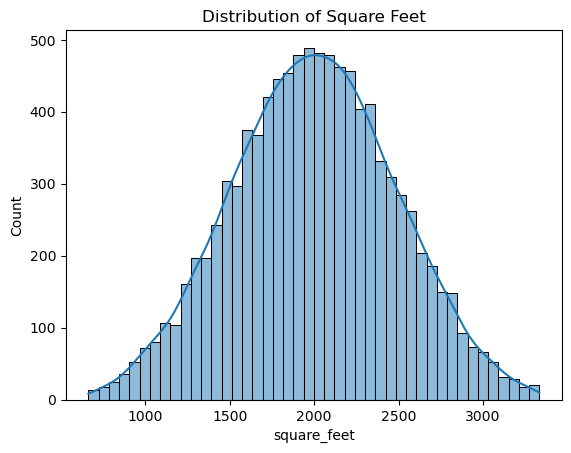

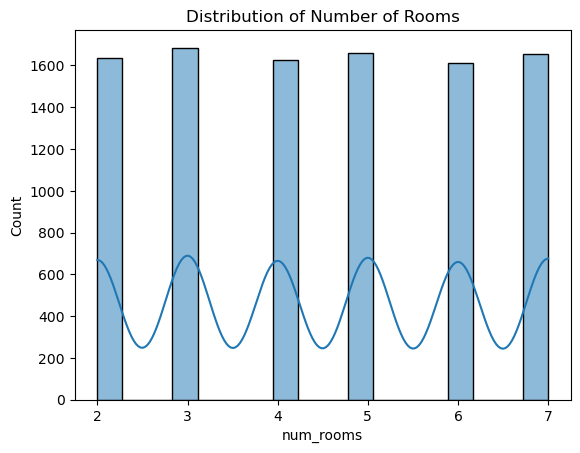

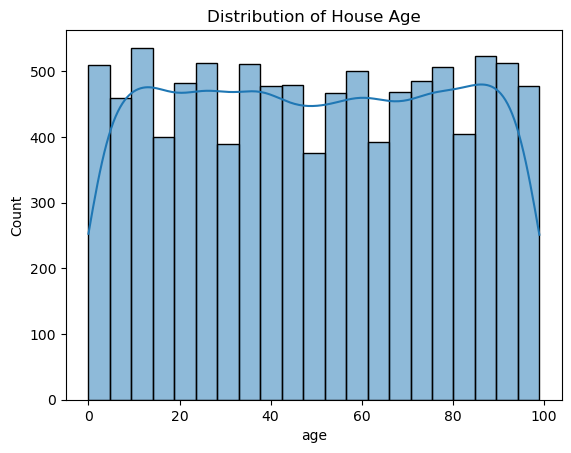

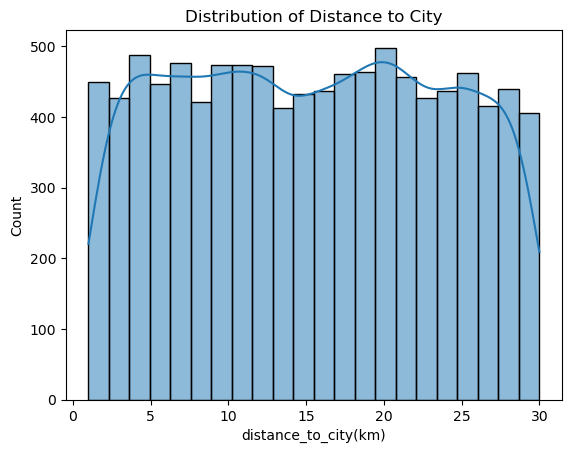

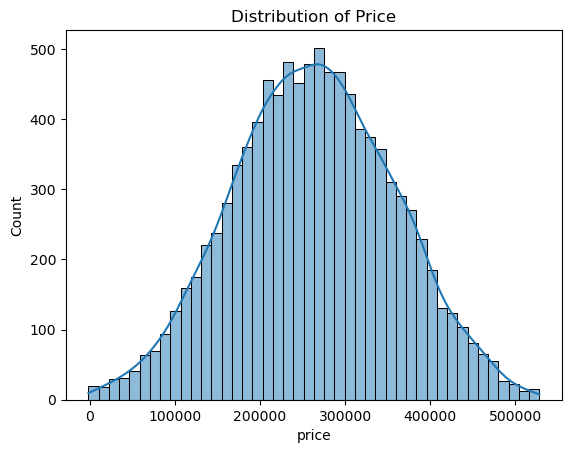

In [47]:
plt.figure()
sns.histplot(df['square_feet'], kde=True)
plt.title("Distribution of Square Feet")
plt.show()

plt.figure()
sns.histplot(df['num_rooms'], kde=True)
plt.title("Distribution of Number of Rooms")
plt.show()

plt.figure()
sns.histplot(df['age'], kde=True)
plt.title("Distribution of House Age")
plt.show()

plt.figure()
sns.histplot(df['distance_to_city(km)'], kde=True)
plt.title("Distribution of Distance to City")
plt.show()

plt.figure()
sns.histplot(df['price'], kde=True)
plt.title("Distribution of Price")
plt.show()



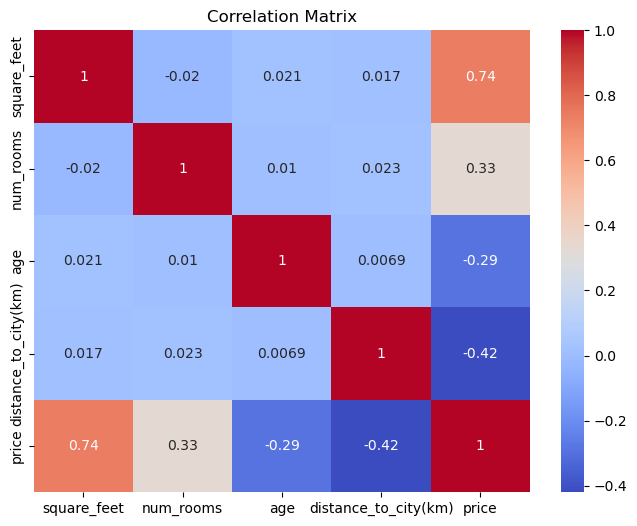

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [24]:
df.isnull().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

In [13]:
df['square_feet'].fillna(df['square_feet'].median(), inplace=True)
df['num_rooms'].fillna(df['num_rooms'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)
df['distance_to_city(km)'].fillna(df['distance_to_city(km)'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4780\1007675165.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['square_feet'].fillna(df['square_feet'].median(), inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4780\1007675165.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [26]:
df.duplicated().sum()

df.drop_duplicates(inplace=True)

In [27]:
# square_feet
Q1 = df['square_feet'].quantile(0.25)
Q3 = df['square_feet'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['square_feet'] >= Q1 - 1.5*IQR) & (df['square_feet'] <= Q3 + 1.5*IQR)]

# num_rooms
Q1 = df['num_rooms'].quantile(0.25)
Q3 = df['num_rooms'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['num_rooms'] >= Q1 - 1.5*IQR) & (df['num_rooms'] <= Q3 + 1.5*IQR)]

# age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['age'] >= Q1 - 1.5*IQR) & (df['age'] <= Q3 + 1.5*IQR)]

# distance_to_city
Q1 = df['distance_to_city(km)'].quantile(0.25)
Q3 = df['distance_to_city(km)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['distance_to_city(km)'] >= Q1 - 1.5*IQR) &
        (df['distance_to_city(km)'] <= Q3 + 1.5*IQR)]

# price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]


# Model Training
## Train-Test Split

In [28]:
X = df[['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Train Multiple Linear Regression Model

In [29]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [33]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 15834.85250829312
RMSE: 19779.21630483313
R² Score: 0.956358358831445


# Performance Visualization

### Actual vs Predicted

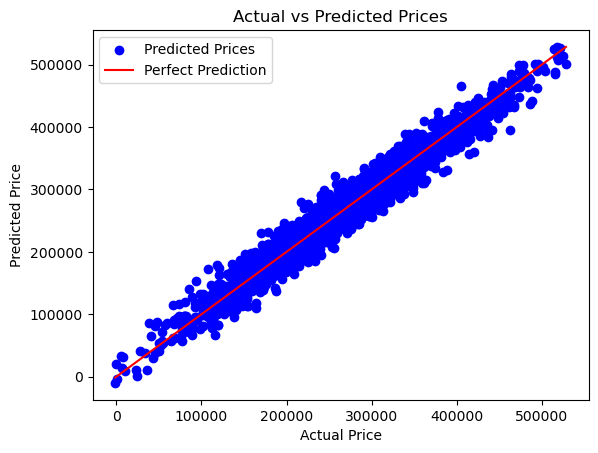

In [38]:
# plt.figure()
# plt.scatter(y_test, y_pred)
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Prices")
# plt.show()



plt.figure()

# Actual vs Predicted points
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red',
         label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


# Conclusion and Future Work
## Conclusion

### Multiple Linear Regression was applied successfully

### House price depends strongly on:

### square_feet

### distance_to_city

### age

### The model performance was evaluated using MAE, RMSE, and R²

### Residual analysis confirms suitability of linear regression


## Future Work

### Feature scaling (StandardScaler)

### Multicollinearity check using VIF

### Polynomial regression

### Advanced models (Ridge, Lasso, Random Forest)